# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
# импортируем необходимые библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
data = pd.read_csv('/Users/sergey/Desktop/Проекты ЯП/real_estate_data.csv', sep='\t') 

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info() # смотрим общую информацию по DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

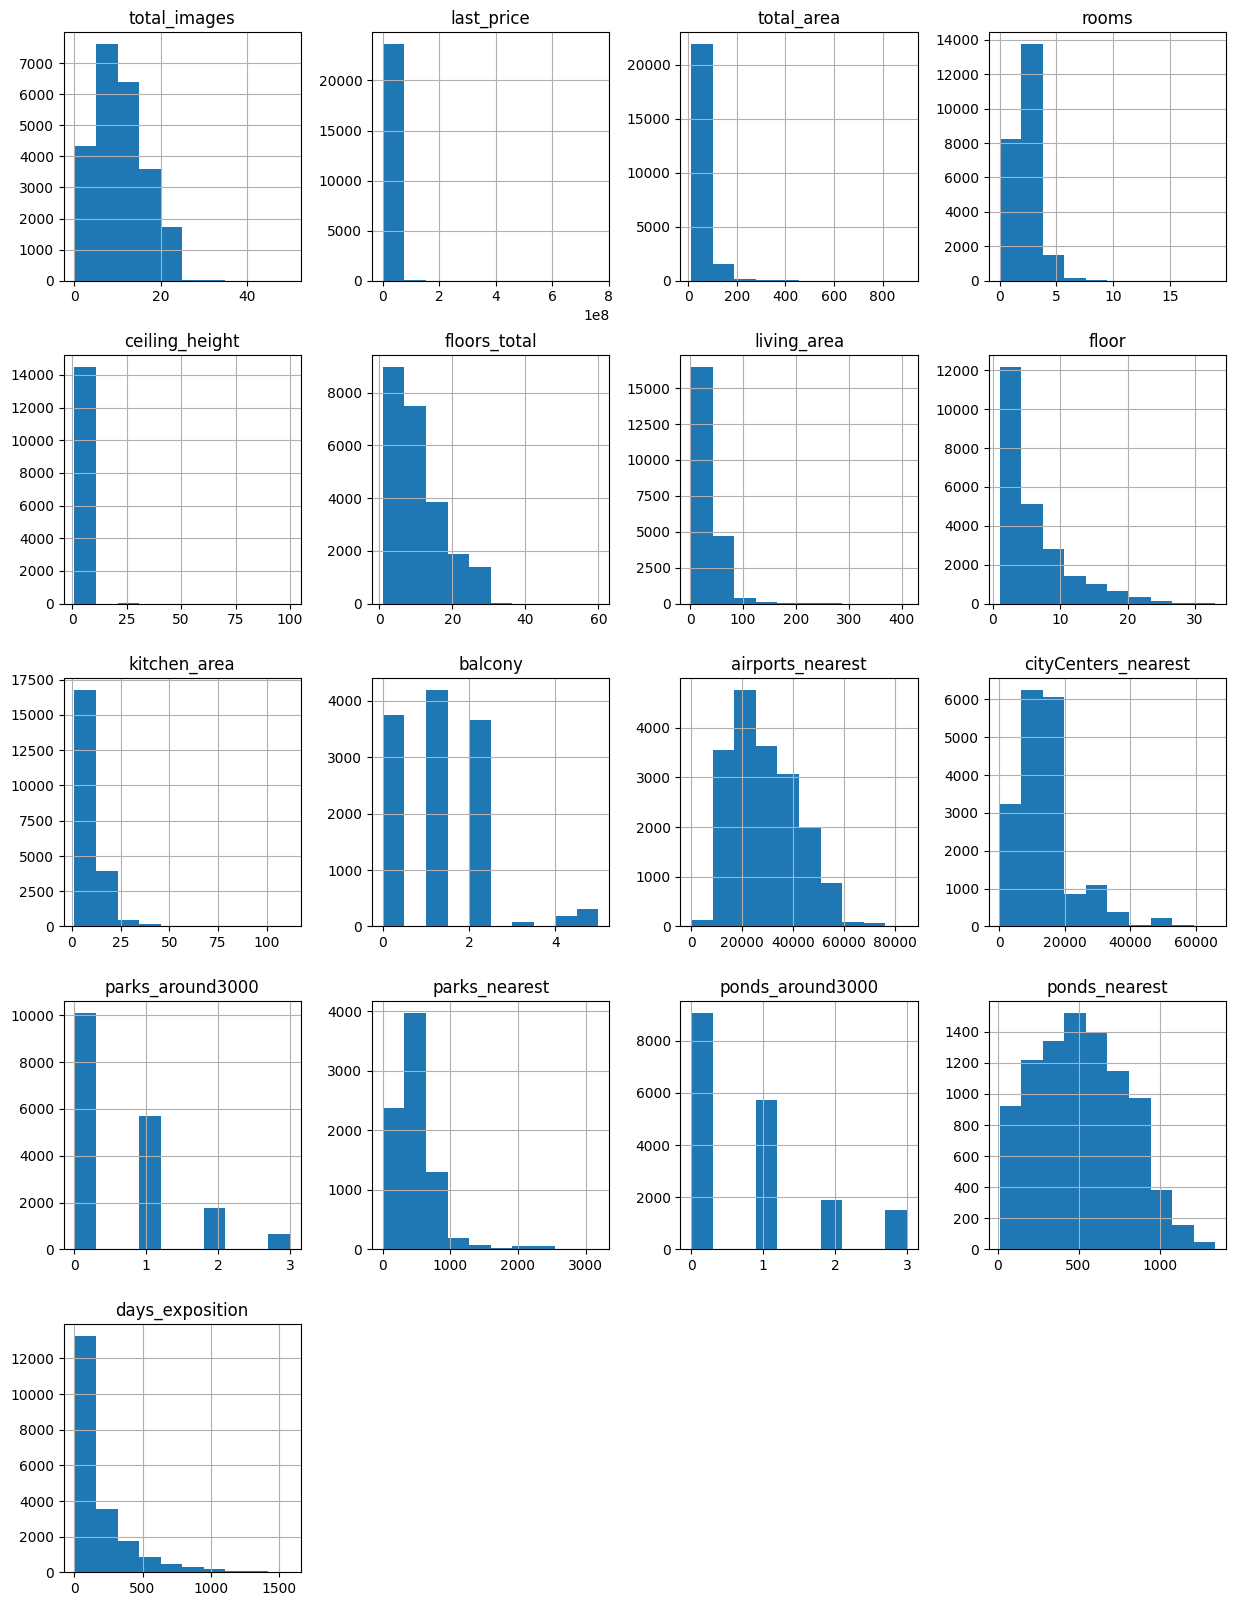

In [4]:
data.hist(figsize=(15, 20)); # выводим гистограммы для числовых столбцов

### Вывод:
При помощи библиотеки pandas открыли csv файл, он состоит из 23699 сторк. Выведя первые 30 строк и проанализировав информацию о таблице через info(), видно пропуски, несоответсвие типов данных, ошибки в названии столбцов. На гистограммах видны вбросы. Требуется выполнить предобработку данных.

### Выполните предобработку данных

In [5]:
data.columns # выводим наименования столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
data = data.rename(
    columns={'cityCenters_nearest' : 'city_сenters_nearest',
            'parks_around3000' : 'parks_around_3000',
            'ponds_around3000' : 'ponds_around_3000'},
    ) # заменили стилистически не правильные названия столбцов

In [7]:
data.duplicated().sum() # проверяем явные дубликаты

0

Явные дубликаты отсутствуют.

In [8]:
data.isna().sum() # находим количество пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
data['ceiling_height'].unique() # выведем все уникальные значения

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Видно пропущенные и не корректные значения.

In [10]:
data['ceiling_height'].median()

2.65

In [11]:
data['ceiling_height'].fillna(data['ceiling_height']
                              .median(), inplace=True) # заменим пропущенные значения - медианным значением

Медианное значение выглядит реалистично. Заменим пропуски. Аномальными значениями займемся позже.

In [12]:
data['floors_total'].unique() # выведем все уникальные значения

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [13]:
data['floors_total'].fillna('1', inplace=True) # заменяем пропущенные значения - 1.

Таких значений не очень много, всего 86. Предположим, жители одноэтажных домов не указали этот параметр.


In [14]:
for t in data['rooms'].unique(): # цикл, который заменит пропуски медианными значениями в зависимости от кол-ва комнат
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()

In [15]:
data['living_area'].isna().sum() # убедимся, что цикл заполнил все пропуски в столбце жилой площади

0

Пропущенные значения в столбце "living_area" заменили на медианные значения, в зависимости от количества комнат в объявлении.

In [16]:
data['is_apartment'].unique() # выведем все уникальные значения

array([nan, False, True], dtype=object)

In [17]:
data['is_apartment'].value_counts() # подсчитаем каждое уникальное значение

False    2725
True       50
Name: is_apartment, dtype: int64

In [18]:
data['is_apartment'].fillna(False, inplace=True) #заменяем все пропущенные значения на False

Заменил все пропуски булевым значение False. Предположим, что продавцы апартаментов указали бы этот фактор, остальные просто пропустили его.

In [19]:
data.loc[data['kitchen_area'].isna()].head(15) # выведем строки, где пропущенно значение в kitchen_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,17.6,2,False,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,30.5,1,False,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,17.6,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,17.6,13,False,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
60,3,2740000.0,35.0,2018-01-01T00:00:00,1,2.65,12.0,17.6,8,False,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.65,10.0,17.6,6,False,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.0,80.5,2018-01-15T00:00:00,3,2.65,25.0,45.0,16,False,...,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
133,12,3150000.0,31.0,2018-03-23T00:00:00,1,2.65,25.0,17.6,6,False,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0
144,1,2450000.0,27.0,2017-03-30T00:00:00,0,2.65,24.0,15.5,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0


Выведя строки с пропущенными значениями в kitchen_area, видно, что такие пропуски имеются в квартирах разных площадей. Количество комнат так же не влияет на отсутствие этих данных. Тогда заменим пропуски медианным значением в зависимости от количества комнат.

In [20]:
# цикл, который заменит пропуски медианными значениями в зависимости от кол-ва комнат
for t in data['rooms'].unique(): 
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == t), 'kitchen_area'].median()

/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [21]:
data['kitchen_area'].isna().sum() # проверяем оставшиеся пропуски

197

Было 2278 пропусков, а стало 197. Выясним какие значения не поменялись на медианные после обработки цикла.

In [22]:
data.loc[data['kitchen_area'].isna()].head(10) # выведем строки с пропусками в kitchen_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.30,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,18.00,7,False,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,2.65,18.0,18.00,8,False,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.00,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,2.65,27.0,18.00,7,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0


Пропущенные значения в столбце kitchen_area остались там, где количество комнат равно нулю. Это может быть связано с тем, что владельцы студий могли указать нулевое количество комнат. Поэтому значения площади кухни для таких квартир остались пропущенными. 

In [23]:
data['kitchen_area'].fillna('0', inplace=True)

In [24]:
data['kitchen_area'].isna().sum()

0

В ходе выполнения анализа, сначала заменили пропуски медианными значениями в зависимости от количества комнат, при помощи написанного цикла. Повторно проанализировав данные, обнаружили еще 197 пропусков. Эти значения были в объявлениях, где количество конмнат равно нулю. Предположили, что это квартиры студии, общее значение площади так же соответсвует этому предположению. Заменим оставшиеся пропуски нулевым значением. Таким образом, все пропущенные значения в столбце kitchen_area были заполнены, что позволит провести более точный анализ данных.

In [25]:
data['balcony'].fillna('0', inplace=True) # заменим пропуски нулем

Вероятнее всего, пропуски упоминания балкона в объявлении могут быть связанны с его отсутствием. 

In [26]:
data['locality_name'].unique() # выведем все уникальные значения населенных пунктов

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [27]:
data['locality_name'].fillna('unknown', inplace=True) # заменим пропуски

Нет возможности восстановить названия населенных пунктов. Их всего 49, поэтому заменим их на unknown.

In [28]:
data['parks_around_3000'].unique() # выведем уникальные значения

array([ 1.,  0.,  2., nan,  3.])

In [29]:
data['parks_around_3000'].fillna('0', inplace=True) # заменим пропущенные значения

Эти данные заполняются автоматически, предположим, что пропущеные значения говорят об отсутствии парков в радиусе 3 км.

In [30]:
data['ponds_around_3000'].unique() # выведем уникальные значения

array([ 2.,  0.,  3.,  1., nan])

In [31]:
data['ponds_around_3000'].fillna('0', inplace=True) # заменим пропущенные значения

Эти данные заполняются автоматически, предположим, что пропущеные значения говорят об отсутствии водоемов в радиусе 3 км.

In [32]:
data['days_exposition'].describe() # посмотрим на 

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [33]:
data['days_exposition'].fillna(data['days_exposition']
                              .median(), inplace=True) # заменим пропущенные значения - медианным значением')

Заменим пропущенные значения на медианные. Слишком большие значения встречаются редко, допустим, что эти квартиры продали за 95 дней.

In [34]:
data.isna().sum() # проверим пропущенные значения после заполннения пропусков, где это возможно

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition             0
dtype: int64

### Вывод:
В результате анализа данных, мы исправили некорректные названия столбцов. На стилистически правильные названия, заполнили пропуски там, где это возможно в зависимости от столбца. 

В столбце ceiling_height заменили пропуски медианным значением, так как оно удовлетворяет реальным представлениям о высоте потолка.

Пропуски в living_area и kitchen_area заменили на медианные значения в зависимости от количества комнат.

В столбце floors_total - пропуски заменили значением 1, вероятно, люди в одноэтажных домах не указывали этот параметр. 

Столбец is_apartment является булевым, большинсво объявлений не являются апартаментами, владельцы таких квартир указали бы эту особенность. Возможно, что владельцы обычных квартир не обратили внимания на этот пункт. Таким образом заменили это значение на False. 

Пропущенные значения в balcony заменили на 0, предполагая отсутствие балкона в некоторых типах квартир. 

Пропуски в столбцах parks_around_3000 и ponds_around_3000 так-же заменили на 0, этот параметр заполняется автоматически, мог произойти сбой при переносе данных или в этой зоне отсутствуют водоемы  или парки.

Пропуски в days_exposition заменили на медианные значения. Медианное значение удовлетворяет нашим ожиданиям. На гистограмме видно аномальные значения, разберемся с ними позже.

В столбцах airports_nearest, city_сenters_nearest, parks_nearest, ponds_nearest пропуски оставили без изменений, так как нет возможности достоверно заполнить или заменить эти значения из-за большой вариативности данных. 

### Приведем данные, к корректному типу данных:

In [35]:
data.info() # для наглядности выведем тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  object 
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  object 
 13  balcony               23699 non-null  object 
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [36]:
data = data.astype({'last_price' : 'int',
            'floors_total' : 'int',
            'kitchen_area' : 'float',
            'balcony' : 'int',
            'parks_around_3000' : 'int',
            'ponds_around_3000' : 'int',
            'days_exposition' : 'int',
            })

In [37]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # приведем дату в правильный формат, для корректной работы

In [38]:
data.info() # проверим тип данных, после изменений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Вывод:
- В столбцах last_price, floors_total, balcony, parks_around_3000, ponds_around_3000 и days_exposition был изменен тип данных на целочисленный (int). Эти столбцы содержат только целые числа, такие как количество балконов или этажей, которые не могут быть представлены вещественными числами.

- Столбец first_day_exposition был приведен к типу данных datetime. Это было сделано для того, чтобы Python мог правильно интерпретировать даты и обеспечить удобную работу с ними.

- В столбце kitchen_area данные хранятся в виде вещественных чисел, указывающих площадь кухни. Поэтому тип данных был изменен на float, чтобы сохранить точность и соответствие хранимым данным.

Эти изменения типов данных помогут обеспечить корректное представление информации и упростят дальнейшую работу с данными в Python.
    
    
    

### Удалим  дубликаты в названии населенных пунктов:

In [39]:
data['locality_name'] = data['locality_name'].str.lower() # приведем все к нижнему регистру

In [40]:
data['locality_name'].nunique() # просчитаем количество уникальных значений до обработки

365

In [41]:
data['locality_name'].unique() # изучим все уникальные значения

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

Видны неявные дубликаты. Буквы "e" и "ё", поселок и поселок городского типа с одинаковыми названиями, записаны как разные, "Мурино" и "поселок Мурино". Необходимо заменить и привести к единому значению такие записи.

In [42]:
data['locality_name'] = (
  data['locality_name']
 .str.replace('ё', 'е')
 .replace(['коттеджный поселок ', 'городской поселок ', 'поселок городского типа '], 'поселок', regex=True)
 .replace('мурино', 'поселок мурино')
) # применим метод replace, для замены не правильных записей

In [43]:
data['locality_name'].nunique() # количество уникальных значений после обработки

323

### Вывод:
В результате удаления неявных дубликатов, удалось сократить количество уникальных значений с 365 до 323. Таким образом удалили 42 не явных дубликата, что может помочь улучшить качество данных и избежать искажений при анализе. 

### Обработка аномальных значений:

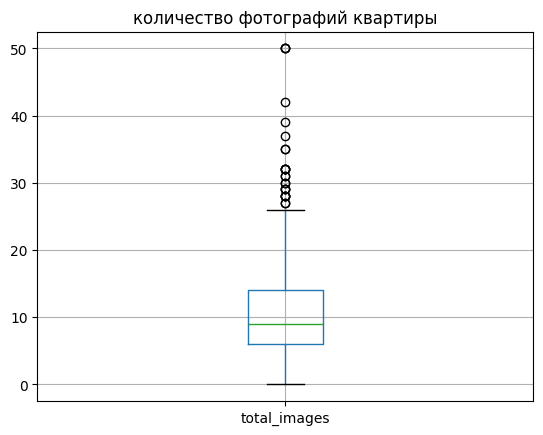

In [136]:
data.boxplot('total_images') # строим диграмму размаха
plt.title('количество фотографий квартиры')
plt.show()

#### Из анализа графика размаха по количеству фотографий, добавленных пользователями, видно, что вариативность данных довольно высока - от 0 до 50 фото. Это указывает на то, что пользователи имеют различные подходы к добавлению фотографий к объявлениям о продаже квартир. Некоторые пользователи загружают большое количество фотографий, в то время как другие могут ограничиться минимальным количеством или даже не добавлять фотографии вовсе.

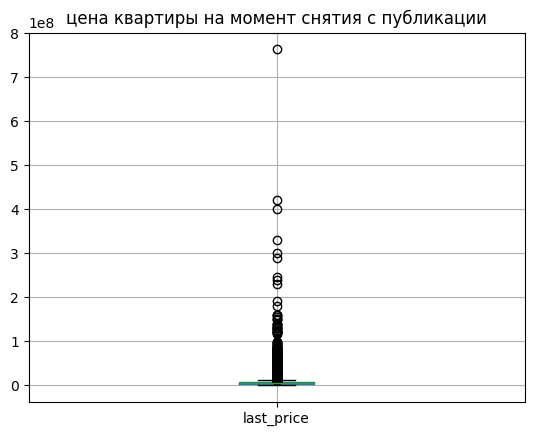

In [45]:
data.boxplot('last_price') # строим диграмму размаха до обработки
plt.title('цена квартиры на момент снятия с публикации')
plt.show()

Разглядеть данные на этой диаграмме размаха не предоставляется возможным. Убирая значения выше 20 млн рублей, мы получим более четкую картину распределения цен на квартиры.

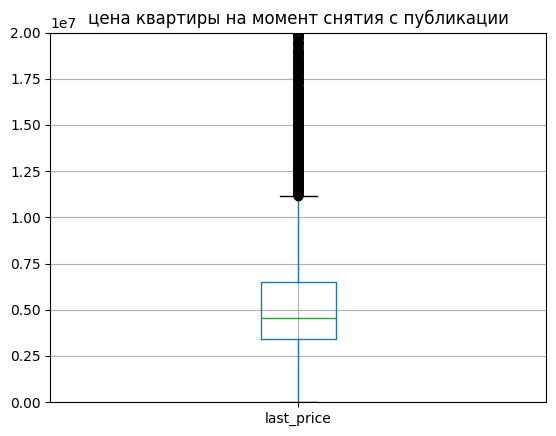

In [46]:
data = data.query("last_price <= 20000000")
data.boxplot('last_price') # строим диграмму размаха после обработки
plt.ylim(0, 20000000)
plt.title('цена квартиры на момент снятия с публикации')
plt.show()

#### Проведя срез значений и ограничив стоимость квартир до 20 млн рублей, мы выяснили, что подавляющее большинство объявлений о продаже квартир попадает в этот диапазон цен. Недвижимость стоимостью выше 20 млн рублей предназначена для особой аудитории и может исказить наш анализ из-за их небольшого количества. Это может быть связано с тем, что квартиры с более высокой ценой имеют специфические особенности и требуют особого подхода к продаже.

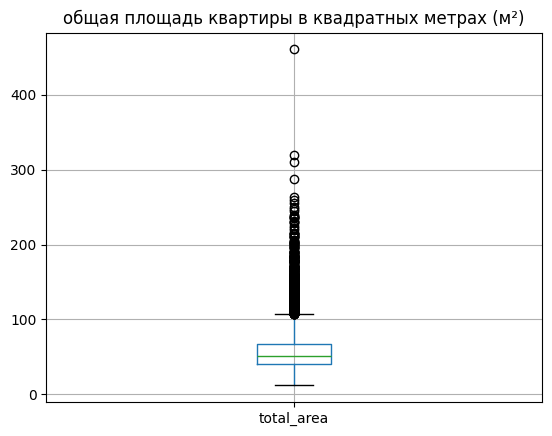

In [47]:
data.boxplot('total_area') # строим диграмму размаха
plt.title('общая площадь квартиры в квадратных метрах (м²)')
plt.show()

#### На диаграмме рамаха о площади квартир можно сделать вывод, что распределение выглядит реалистично и не содержит аномальных значений. Большинство квартир имеют площадь около 50 квадратных метров, что соответствует типичным параметрам жилой площади.

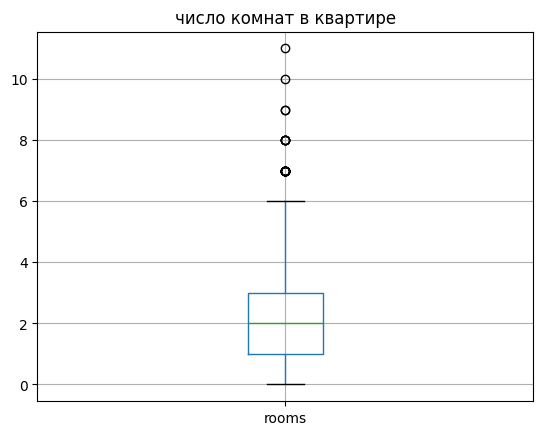

In [48]:
data.boxplot('rooms') # строим диграмму размаха до обработки
plt.title('число комнат в квартире')
plt.show()

#### На построенной диаграмме размаха видно разнообразие предложений на рынке.

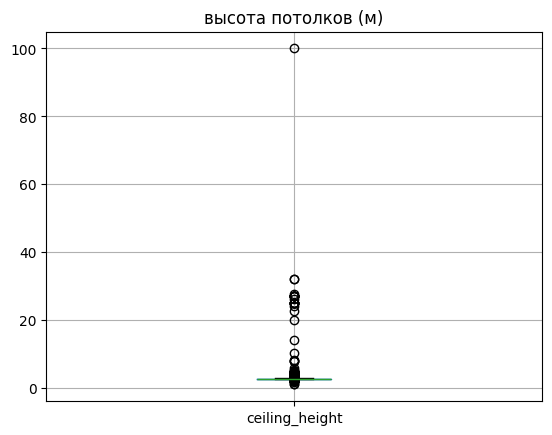

In [49]:
data.boxplot('ceiling_height') # строим диграмму размаха до обработки
plt.title('высота потолков (м)')
plt.show()

In [50]:
data['ceiling_height'].sort_values(ascending=False).head(30) # отсортируем значения по убыванию

22869    100.0
22336     32.0
3148      32.0
21377     27.5
10773     27.0
5807      27.0
5246      27.0
22938     27.0
4876      27.0
17857     27.0
20478     27.0
21824     27.0
5669      26.0
6246      25.0
18545     25.0
11285     25.0
4643      25.0
355       25.0
14382     25.0
9379      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
15743      8.0
17442      8.0
21227      5.8
Name: ceiling_height, dtype: float64

Можно предположить, что большие значения допущенны из-за пропущенной запятой. Тогда сдвинем положение знака запятой влево, для значений более 20 метров.

In [51]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

In [52]:
data['ceiling_height'].sort_values(ascending=False).tail(20) # смотрим минимальные значения

17762    2.30
23498    2.30
20507    2.26
17794    2.25
12755    2.20
552      2.00
19098    2.00
16446    2.00
20520    2.00
4212     2.00
16884    2.00
2572     2.00
19329    2.00
5850     2.00
11352    2.00
22960    2.00
17496    2.00
16934    1.75
5712     1.20
22590    1.00
Name: ceiling_height, dtype: float64

В минимальных значениях видим потолки высотой менее 2 метра, это кажется нереалистичным для жилых помещений. Уберем эти значения из дальнейшего анализа.  

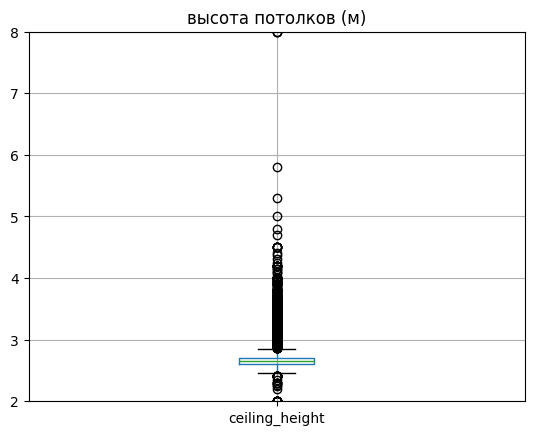

In [53]:
data = data.query('2 <= ceiling_height <= 8') # сделаем срез от 2 до 8
data.boxplot('ceiling_height') # строим диграмму размаха после обработки
plt.ylim(2, 8)
plt.title('высота потолков (м)')
plt.show()


#### Были сделаны срезы по высоте потолков от 2 до 8 метров для дальнейшего анализа. Это позволит исключить аномальные значения и сосредоточиться на более реалистичных данный при изучении других характеристик квартир.


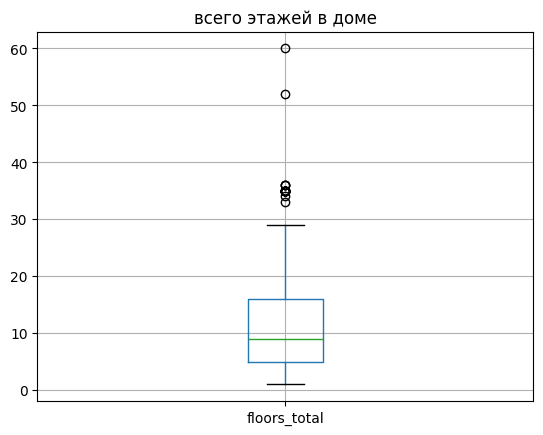

In [54]:
data.boxplot('floors_total') # строим диграмму размаха до обработки
plt.title('всего этажей в доме')
plt.show()

Видим два вброса, выведем их и изучим.

In [55]:
data.loc[data['floors_total'] > 40]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,7.4,0,кронштадт,67763.0,49488.0,2,342.0,3,614.0,166
16731,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,14.0,0,санкт-петербург,20728.0,12978.0,1,793.0,0,NaN,45


Видим, что в этих зданиях общее количество этажей более 50. Исходя из данных в интернете, в СПБ, самое высокое жилое здание имеет 36 этажей. 

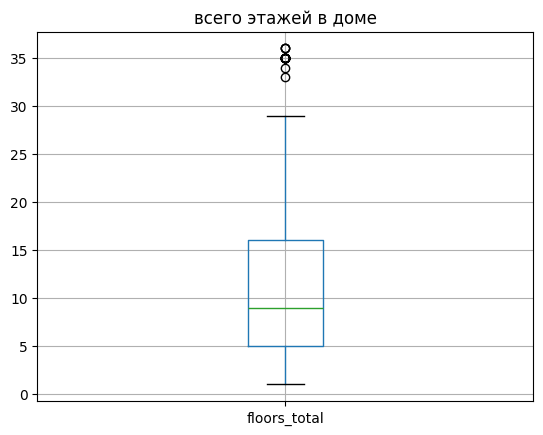

In [56]:
data = data.query('floors_total < 40') # сделаем срез по этажам
data.boxplot('floors_total') # строим диграмму размаха
plt.title('всего этажей в доме')
plt.show()

#### В ходе анализа было принято решение сделать срез по данным об общем количестве этажей до 40 для дальнейшего анализа. Это позволит исключить аномальные значения и сконцентрироваться на более реалистичных данных при изучении других характеристик квартир.

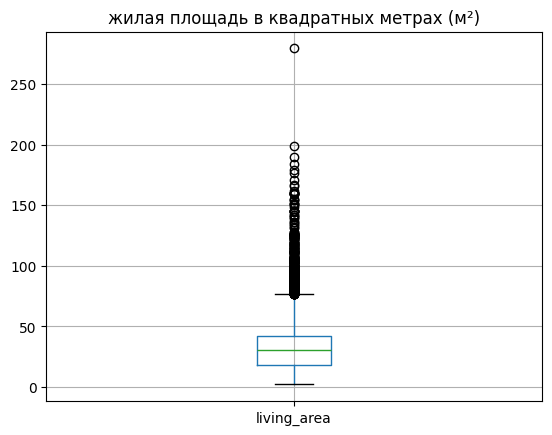

In [57]:
data.boxplot('living_area') # строим диграмму размаха
plt.title('жилая площадь в квадратных метрах (м²)')
plt.show()

#### Все значения  в норме, не вижу ничего аномального, оставляем как есть.

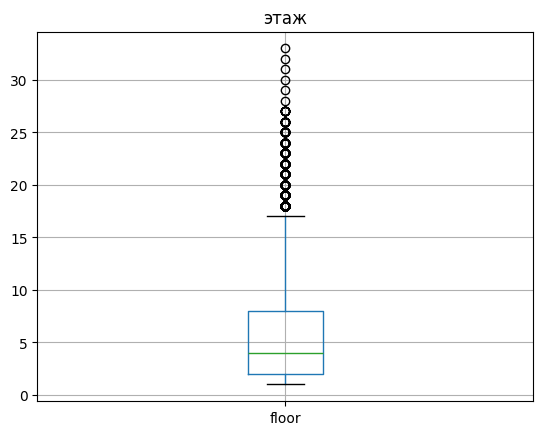

In [58]:
data.boxplot('floor') # строим диграмму размаха
plt.title('этаж')
plt.show()

#### Полученные данные совпадают и удовлетворяют нашему срезу по общему количеству этажей в зданиях(не превышают значение 40). Оставляем без изменений.

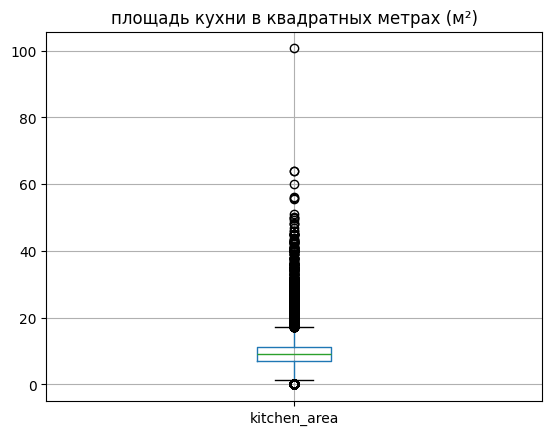

In [59]:
data.boxplot('kitchen_area') # строим диграмму размаха
plt.title('площадь кухни в квадратных метрах (м²)')
plt.show()

In [60]:
data.loc[data['kitchen_area'] > 80] # выведем объявление с самой большой кухней

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2489,9,12500000,255.0,2017-04-21,3,2.65,2,153.9,2,False,...,100.7,0,санкт-петербург,29544.0,6916.0,0,NaN,3,198.0,102


#### Выделяющееся значение самой большой кухни, подтвержденно данными, из объявления. У этой квартиры общая площадь 255 м². Оставляем данные без изменений.

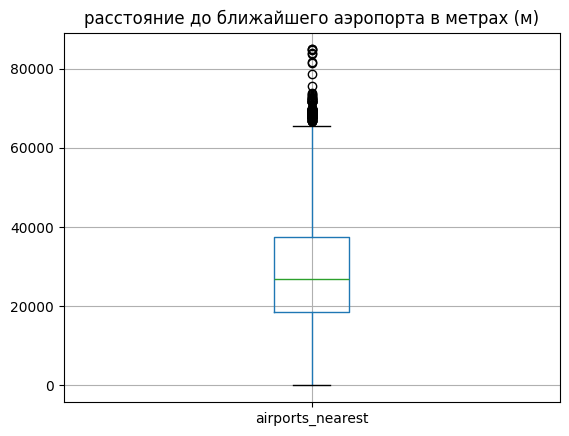

In [61]:
data.boxplot('airports_nearest') # строим диграмму размаха
plt.title('расстояние до ближайшего аэропорта в метрах (м)')
plt.show()

#### Все значения в пределах нормы и могут соответствовать действительности.

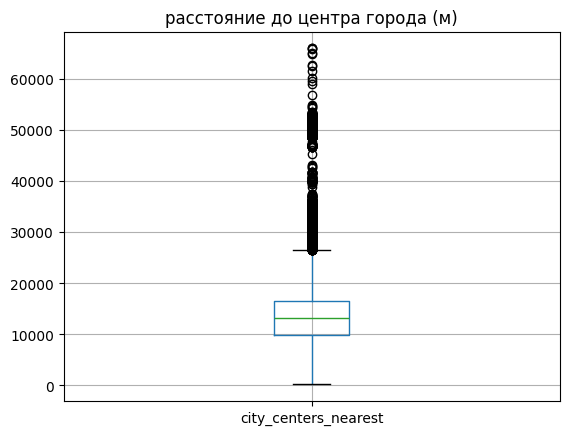

In [62]:
data.boxplot('city_сenters_nearest') # строим диграмму размаха
plt.title('расстояние до центра города (м)')
plt.show()

#### Все значения в пределах нормы и могут соответствовать действительности.

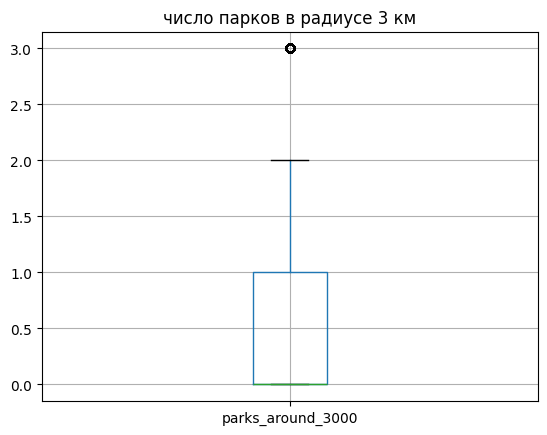

In [63]:
data.boxplot('parks_around_3000') # строим диграмму размаха
plt.title('число парков в радиусе 3 км')
plt.show()

#### В нашем радиусе обаружено не более 3 парков.

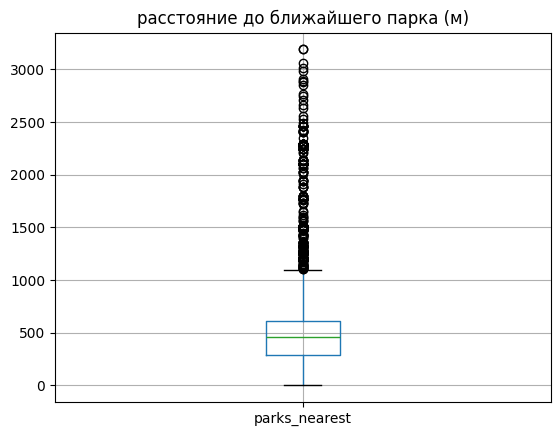

In [64]:
data.boxplot('parks_nearest') # строим диграмму размаха
plt.title('расстояние до ближайшего парка (м)')
plt.show()

#### Большинство квартир имеют парк на расстоянии до 1 киллометра. В целом имеются предложения  удаленные от парка более чем на 3 киллометра.

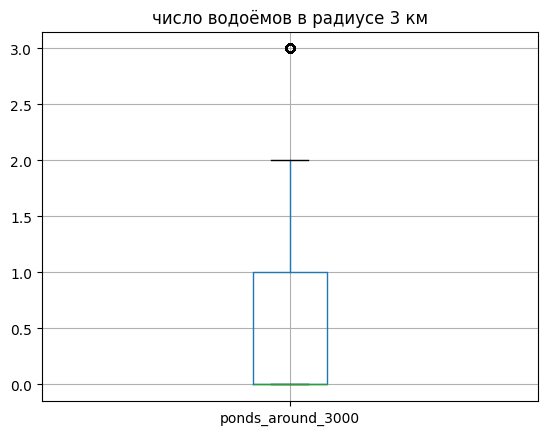

In [65]:
data.boxplot('ponds_around_3000') # строим диграмму размаха
plt.title('число водоёмов в радиусе 3 км')
plt.show()

#### В наших объявлениях количество водоемов не превышает 3 штук, в радиусе 3 киллометра.

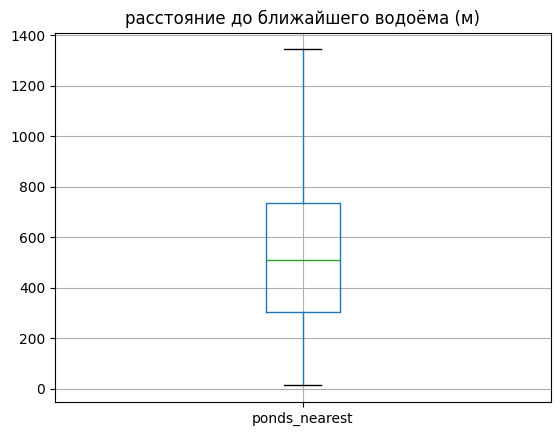

In [66]:
data.boxplot('ponds_nearest') # строим диграмму размаха
plt.title('расстояние до ближайшего водоёма (м)')
plt.show()

#### Из проведенного анализа данных можно сделать вывод, что большинство квартир, которые продаются вблизи водоемов, находятся в среднем на расстоянии около 500 метров от воды.

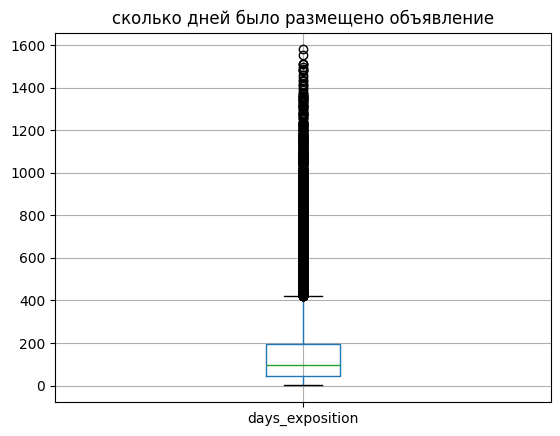

In [67]:
data.boxplot('days_exposition') # строим диграмму размаха
plt.title('сколько дней было размещено объявление')
plt.show()

#### Исходя из диаграммы размаха, можно сделать вывод, что количество дней, которое занимает продажа квартиры, имеет значительное разнообразие и может быть подвержено влиянию различных факторов. Большинство продаж происходит в течение 50-200 дней

**Выводы:**

- Мы обработали редкие и аномальные значения. 
- Сделали срезы по лишним данным, выводили и анализировали отличающиеся данные. 
- Урезали стоимость недвижимости до 20 млн. - сделали срез по более высоким значениям. Такие квартиры можно отнести к отдельной категории. Для нашего анализа они могут дать неверную информацию и зависимость. Такие квартиры рассчитаны на более спецефичного клиента.
- Аномально высокие значения в столбце с высотой потолков были исправлены путем переноса знака запятой, удалили значения которые казались нереалистичными для жилых помещений. Подобрали и сделали срез по оптимальным значениям от 2 до 8 метров. Посчитав что 8 метров могут достигать друхуровневые квартиры, а квартиры с высотой потолка меньше 2 метров не существуют.
- Удалили аномальные значения в столбце с количеством этажей. После очистки данных от выбросов, не соответствующих реальным условиям рынка недвижимости, мы получили более достоверную информацию для анализа.

### Добавим новые столбцы в таблицу

In [68]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,95
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,9.1,0,поселокянино-1,NaN,NaN,0,NaN,0,NaN,55


In [69]:
data['price_one_meter'] = (data['last_price'] / data['total_area']).round() # цена одного квадратного метра

In [70]:
data['price_one_meter'] = data['price_one_meter'].astype('int') # укажем цену целым числом, так удобнее

In [71]:
data['day_publication'] = pd.DatetimeIndex(data['first_day_exposition']).weekday # день недели публикации

In [72]:
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month # месяц публикации

In [73]:
data['year_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year # год публикации

In [74]:
def floor_type(row): # функция определения этажа квартиры
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

In [75]:
data['city_сenters_nearest_km'] = (data['city_сenters_nearest']*0.001).round() # расстояние до центра в киллометрах

In [76]:
data.head() # проверим полученный результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,day_publication,month_publication,year_publication,floor_type,city_сenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,95,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81,82921,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558,92786,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,100000,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,0,NaN,55,95066,0,9,2018,другой,NaN


### Вывод:
Добавили в таблицу цену одного квадратного метра, день, месяц и год публикации объявления, так же расстояние до центра города в киллометрах.

### Проведем исследовательский анализ данных

In [77]:
data['total_area'].describe()

count    22983.000000
mean        56.739988
std         24.813220
min         12.000000
25%         40.000000
50%         51.000000
75%         67.180000
max        460.800000
Name: total_area, dtype: float64

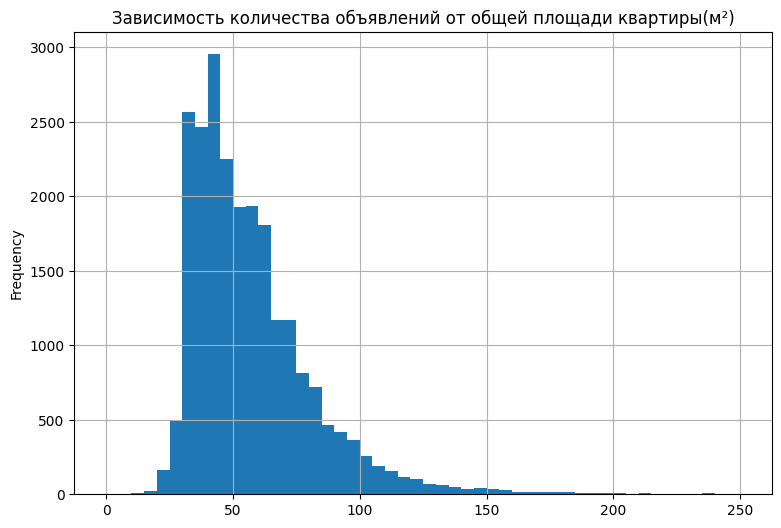

In [78]:
data['total_area'].plot(
    kind='hist', bins=50, range=(0, 250), grid=True, figsize=(9,6),
    xlabel='Общая площадь', ylabel='Количество объявлений',
    title='Зависимость количества объявлений от общей площади квартиры(м²)');

#### На гистограмме видно, что большинство квартир имеют общую площадь в диапазоне от 40 до 50 квадратных метров. Среднее значение этого показателя составляет 56 квадратных метров. Данные также показали, что в межквартильный размах попадают значения от 40 до 67 квадратных метров, что является типичным диапазоном для большинства квартир. Квартир с площадью более 100 квадратных метров значительно меньше, а квартиры с площадью более 150 квадратных метров представлены лишь единичными случаями. 

In [79]:
data['living_area'].describe()

count    22983.000000
mean        32.483167
std         16.694507
min          2.000000
25%         18.195000
50%         30.000000
75%         41.700000
max        279.600000
Name: living_area, dtype: float64

Видим минимальное значение 2, что очень мало для жилой площади.

In [80]:
data.loc[data['living_area'] < 5] # выведем все строки, где жилая площадь меньше 5

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,day_publication,month_publication,year_publication,floor_type,city_сenters_nearest_km
3242,7,4440000,41.0,2017-07-02,1,2.65,17,3.0,17,False,...,NaN,0,NaN,216,108293,6,7,2017,последний,13.0
13915,20,6350000,52.0,2018-02-06,2,3.00,6,2.0,2,False,...,NaN,1,1012.0,91,122115,1,2,2018,другой,7.0
21758,0,2330000,23.0,2018-01-01,0,2.65,24,2.0,22,False,...,NaN,0,NaN,66,101304,0,1,2018,другой,NaN


In [81]:
data['living_area'].corr(data['total_area']) # построим корреляцию Пирсона для отношения общей площади к жилой

0.9139605020443756

Минимальное значение жилой площади равно 2. Было решено удалить строки, где жилая площадь меньше 5 квадратных метров при общей площади квартиры более 40 квадратных метров. Коэффициент корреляции Пирсона показывает, что чем больше общая площадь, тем больше и жилая площадь.  

In [82]:
data = data.query('living_area > 5') # сделаем срез данных

In [83]:
data['living_area'].describe()

count    22979.000000
mean        32.488300
std         16.691419
min          5.400000
25%         18.200000
50%         30.000000
75%         41.700000
max        279.600000
Name: living_area, dtype: float64

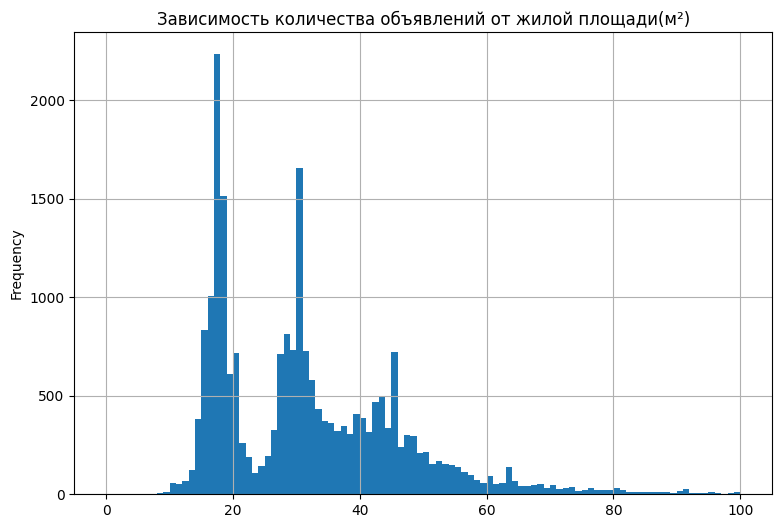

In [84]:
data['living_area'].plot(kind='hist', bins=100, range=(0, 100), figsize=(9,6),grid=True,
                        xlabel='жилая площадь', ylabel='Количество объявлений', 
                         title='Зависимость количества объявлений от жилой площади(м²)'); # построим новую гистограмму


#### На гистограмме видим два пика это 15 кв.м. и 25-30. Очевидно, что это не большие квартиры, с более доступными ценами. Медианное значение равно 30 и практически совпадает со средним(32). В межквартильный размах вхлдят значения от 18 до 41. Провал наблюдается у квартир 20-25 кв.м.. После 60 график начинает стремиться к нулю. Таким образом удаление некорректных значений позволило более точно оценить зависимость между этими параметрами

In [85]:
data['kitchen_area'].describe()

count    22979.000000
mean         9.963380
std          4.623096
min          0.000000
25%          7.100000
50%          9.040000
75%         11.100000
max        100.700000
Name: kitchen_area, dtype: float64

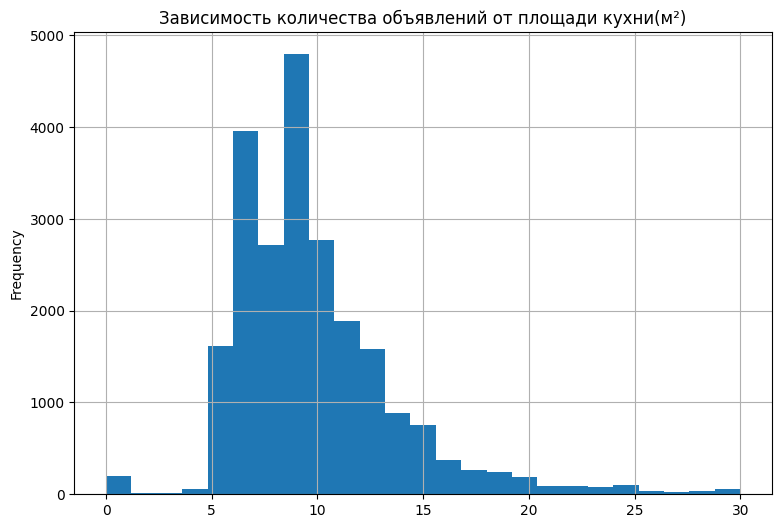

In [86]:
data['kitchen_area'].plot(kind='hist', grid=True, bins=25, range=(0, 30), figsize=(9,6), 
                          title='Зависимость количества объявлений от площади кухни(м²)', 
                          xlabel='площадь кухни', ylabel='Количество объявлений');

#### Пиковое значение находится на значении 6кв.м. Так же имеются квартиры без кухни. Среднее и медианное значение совпадают(9кв.м.). В межквартильный размах входят кухни размером от 7 до 11. Квартир с кухней больше 20 заметно меньше.

In [87]:
(data['last_price'].describe())/1000 # делим значения на 1000 для понятного отображения

count       22.979000
mean      5423.771434
std       3220.172892
min         12.190000
25%       3400.000000
50%       4550.000000
75%       6500.000000
max      20000.000000
Name: last_price, dtype: float64

Опять смущает минимальное значение, вызовем его и рассмотрим.

In [88]:
data.loc[data['last_price'] == data['last_price'].min()] # выводим строку с минимальным значением

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,day_publication,month_publication,year_publication,floor_type,city_сenters_nearest_km
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,805.0,0,NaN,8,112,2,3,2019,последний,9.0


In [89]:
data['last_price'].sort_values().head() # смотрим самые низкие цены

8793      12190
14911    430000
17456    430000
16274    440000
16219    450000
Name: last_price, dtype: int64

Цена квартиры 12190, при размере 109 кв.м.. Возможны схемы мошенничества или ошибки данных. 

In [90]:
data = data.query('last_price > 13000') # выполним срез, уберем аномальное значение

In [91]:
(data['last_price']/1000).describe()

count    22978.000000
mean      5424.006946
std       3220.045055
min        430.000000
25%       3400.000000
50%       4550.000000
75%       6500.000000
max      20000.000000
Name: last_price, dtype: float64

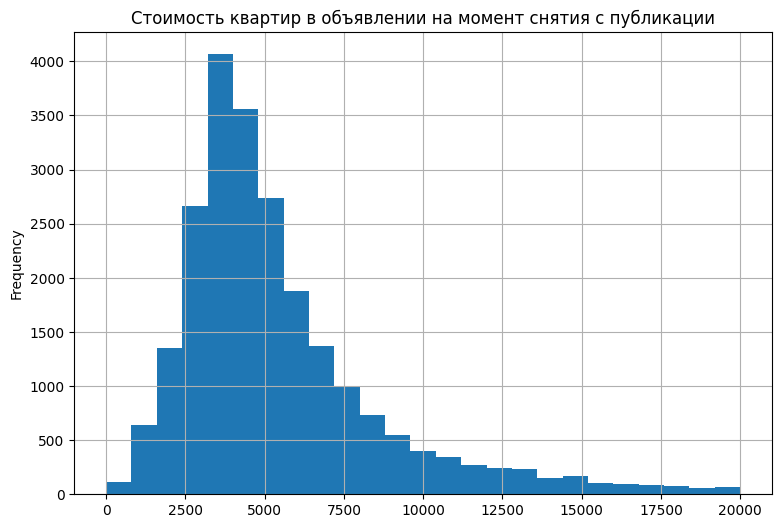

In [92]:
(data['last_price']/1000).plot(kind='hist', grid=True, bins=25, range=(0, 20000), figsize=(9,6),
                              title='Стоимость квартир в объявлении на момент снятия с публикации',
                               xlabel='стоимость квартиры в млн.', ylabel='Количество объявлений'); # разделим на 1000 для понятного отображения


#### Большинство квартир стоят от 3,5 млн. до 4,5 млн. Свыше 10 млн. наблюдается спад в количестве квартир. Средняя стоимость квартир составляет 5,5 млн., медианное значение находится на уровне 4.6 млн. В межквартильный размах входят значения от 3,5 до 6,5 млн.

In [93]:
data['rooms'].describe()

count    22978.000000
mean         2.011011
std          0.986310
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

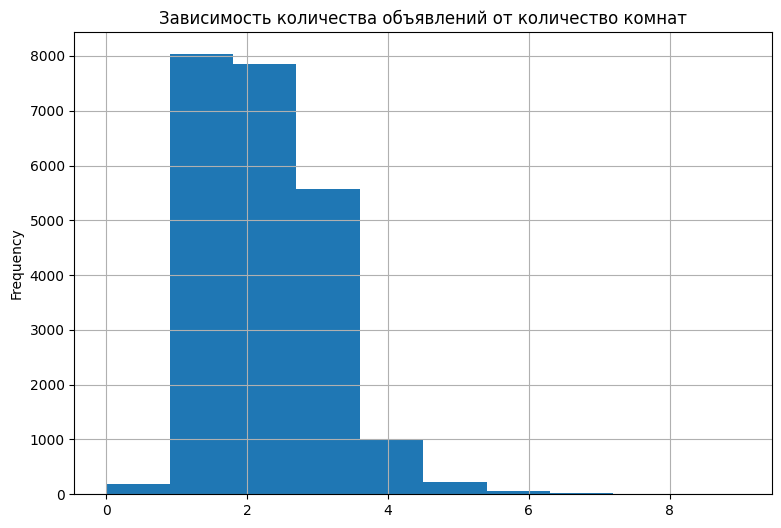

In [94]:
data['rooms'].plot(kind='hist', grid=True, bins=10, range=(0,9), figsize=(9,6),
                  title='Зависимость количества объявлений от количество комнат', 
                   xlabel='Количество комнат', ylabel='Количество объявлений');

#### Больше всего в продаже однокомнатных квартир. Чуть поменьше двухкомнатных. Можно наблюдать обратную зависимость, чем больше комнат, тем меньше объявлений.  Так же продаются квартиры-студии они занимают не большую часть.

In [95]:
data['ceiling_height'].describe()

count    22978.000000
mean         2.687212
std          0.211016
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.000000
Name: ceiling_height, dtype: float64

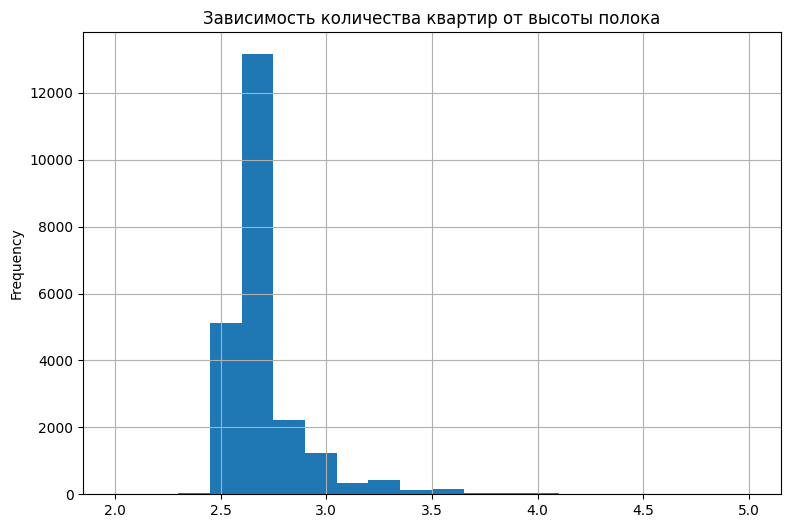

In [96]:
data['ceiling_height'].plot(kind='hist', grid=True, bins=20, range=(2, 5), figsize=(9,6),
                           title='Зависимость количества квартир от высоты полока',
                           xlabel='высота потолка (м)', ylabel='количество объявлений');

#### Большинство квартир имеют высоту потолков около 2,6 метра, что является наиболее распространенным значением. Однако существуют и исключения. Медианное и среднее значение совпадают - 2,65 и 2,68 м. Это говорит о том, что данные распределены достаточно равномерно.
#### В межквартильный размах входят потолки высотой 2,6-2,7 метра, что означает, что большинство квартир находятся в этом диапазоне.

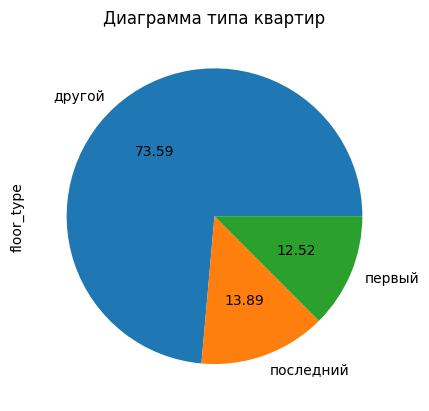

In [97]:
data['floor_type'].value_counts().plot(y='floor_type', kind='pie', title='Диаграмма типа квартир', autopct='%.2f');

#### Квартиры на первом и последнем этаже действительно составляют небольшую часть от общего числа объявлений. Категория "другой" включает в себя все промежуточные этажи, и она действительно является наиболее популярной среди представленных. Распределение квартир по этажам может быть важным фактором при продаже недвижимости, поэтому продавцам стоит учитывать предпочтения покупателей и адекватно оценивать квартиры на первом и последнем этажах.

In [98]:
data['floors_total'].describe()

count    22978.00000
mean        10.69510
std          6.63004
min          1.00000
25%          5.00000
50%          9.00000
75%         16.00000
max         36.00000
Name: floors_total, dtype: float64

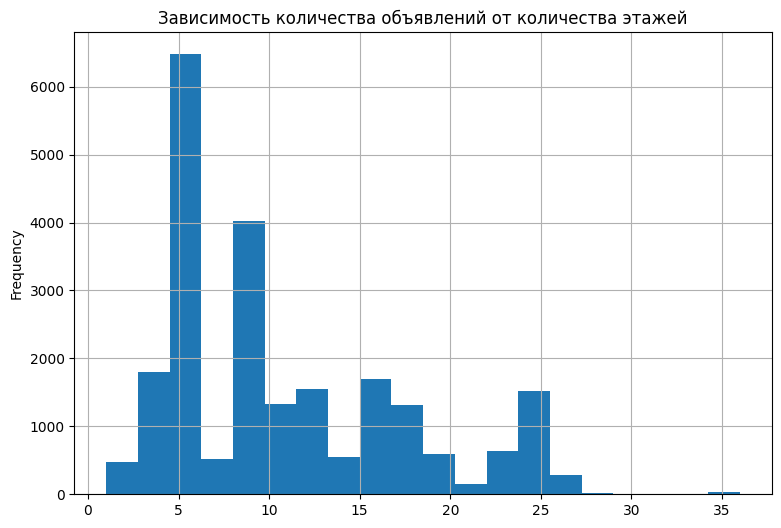

In [99]:
data['floors_total'].plot(kind='hist', grid=True, bins=20, figsize=(9,6),
                         title='Зависимость количества объявлений от количества этажей',
                         xlabel='всего этажей', ylabel='количесто объявлений');

#### Наибольшее количество квартир продается в 5-ти этажных домах, следующий пик наблюдается в 9-ти этажных домах.

In [100]:
data['city_сenters_nearest'].describe()

count    17477.000000
mean     14494.878126
std       8575.003837
min        208.000000
25%       9815.000000
50%      13277.000000
75%      16464.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

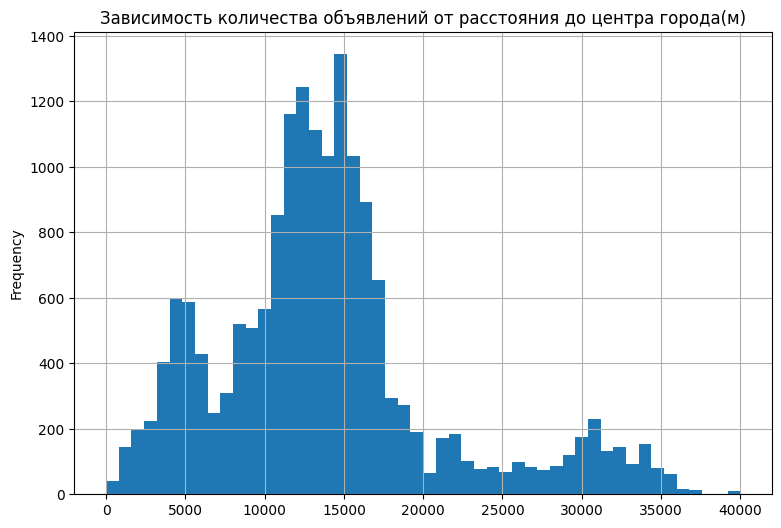

In [101]:
data['city_сenters_nearest'].plot(kind='hist', grid=True, bins=50, range=(0,40000), figsize=(9,6),
                                 title='Зависимость количества объявлений от расстояния до центра города(м)',
                                 xlabel='расстояние до центра города', ylabel='количество объявлений');

#### На графике видно два пика значений расстояния: первый приблизительно на 15000 метров и второй немного меньше - около 12000 метров. После значения более 20000 метров на графике наблюдается спад, что может указывать на уменьшение количества объявлений. Вероятно, это связано с тем, что на таком расстоянии уже начинаются объявления о недвижимости, находящейся за пределами города. Уменьшение количества объявлений на больших расстояниях от центра может быть обусловлено удаленностью от городской инфраструктуры.

In [102]:
data['parks_nearest'].describe()

count    7567.000000
mean      493.787631
std       341.930653
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

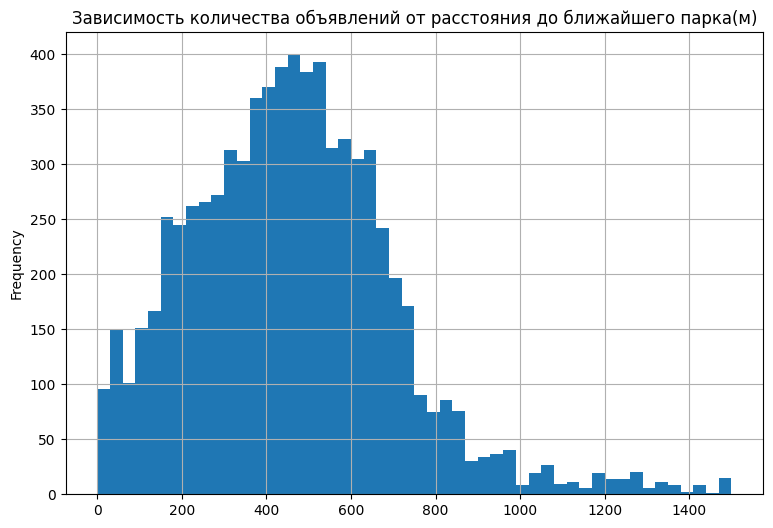

In [103]:
data['parks_nearest'].plot(kind='hist', grid=True, bins=50, range=(0,1500), figsize=(9,6),
                          title='Зависимость количества объявлений от расстояния до ближайшего парка(м)',
                                 xlabel='расстояние до ближайшего парка', ylabel='количество объявлений');

#### Пиковое значение расстояния квартир до парка находится в диапазоне 400-500 метров, это говорит о популярности недвижимости, расположенной вблизи зеленых зон. Минимальное значение расстояния указывает на наличие квартир, расположенных непосредственно возле парка, что может быть привлекательным для любителей природы. Максимально удаленная квартира от парка находится на расстоянии чуть больше 3 км, что говорит о разнообразии предложений на рынке недвижимости в зависимости от удаленности от парков. Большинство квартир имеют парк в радиусе одного километра, что подтверждает предпочтения покупателей к недвижимости с близостью к зеленым зонам.


### Выясним, как быстро продавались квартиры?

In [104]:
data['days_exposition'].describe() # посчитаем среднее и медиану и посмотрим на остальные показатели.

count    22978.000000
mean       167.128558
std        203.879957
min          1.000000
25%         45.000000
50%         95.000000
75%        196.000000
max       1580.000000
Name: days_exposition, dtype: float64

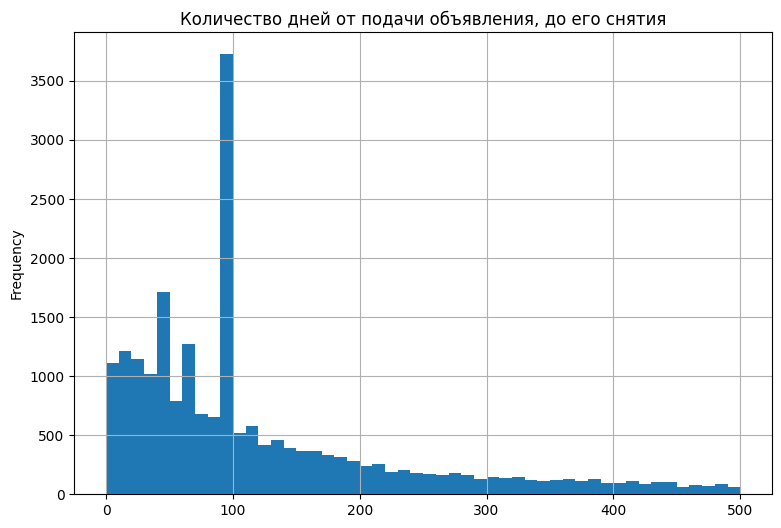

In [105]:
data['days_exposition'].plot(kind='hist', grid=True, bins=50, range=(0,500), figsize=(9,6),
                            title='Количество дней от подачи объявления, до его снятия',
                                 xlabel='количество дней', ylabel='количество объявлений'); # построим гистограмму


Наблюдаем пик на значении 95, так же имеются повышеные значения на 50 и 70 день.

### Вывод:

Анализ данных о продолжительности продажи квартир позволил нам выявить следующие ключевые моменты:

- Пиковое значение продолжительности продажи квартиры приходится на 95 день, что может свидетельствовать о наиболее активном периоде завершения сделок.
- Минимальное значение продолжительности продажи составляет 1 день, что указывает на быструю сделку, возможно, совершенную по предварительной договоренности.
- Максимальное значение продолжительности продажи превышает 4 года, что свидетельствует о необычно долгом времени нахождения объявления на рынке.
- Средняя продолжительность продажи составляет 171 день, а медианное значение равно 95 дня. Это подтверждает, что данные смещены в сторону долгих продаж, что может быть вызвано наличием аномалий и выбросов.
- Межквартильный размах составляет от 47 до 202 дней. Значения за пределами этого диапазона могут считаться как очень быстрыми, так и очень долгими продажами.

Исходя из анализа данных о продолжительности продажи квартир, мы можем выделить быстрые и долгие сделки, а также оценить типичные временные рамки завершения сделок на рынке недвижимости.

### Определяем факторы, которые больше всего влияют на общую стоимость объекта:

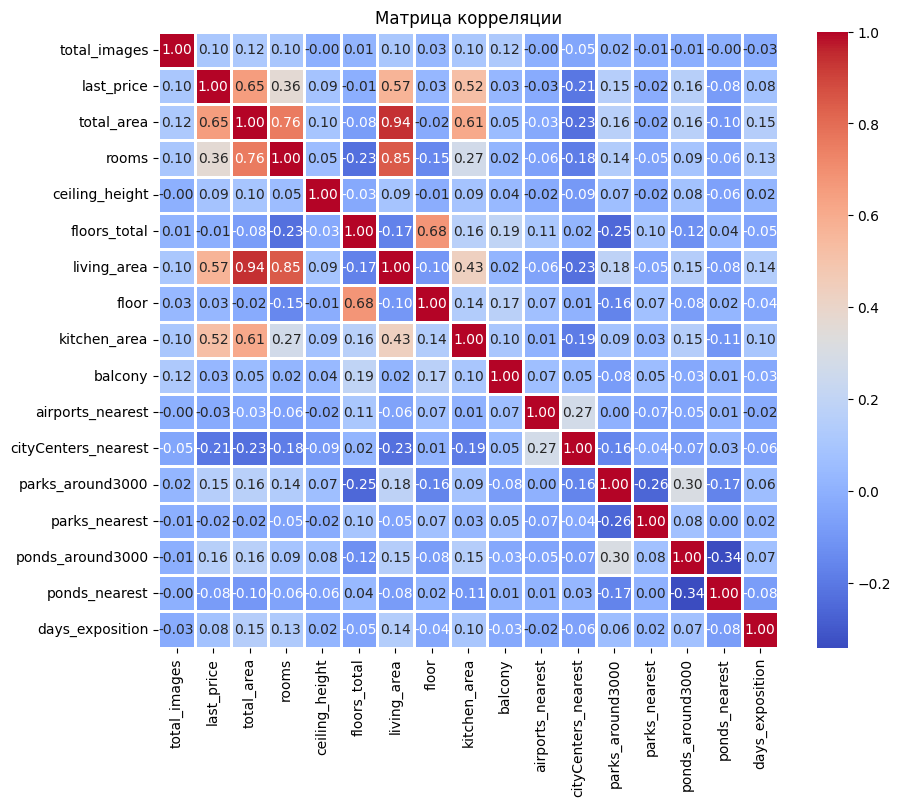

In [140]:
numeric = data.select_dtypes(include='number') # оставим только цифровые значения
plt.figure(figsize=(10, 8)) # зададим размеры
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidth=True) # построим heatmap
plt.title('Матрица корреляции');

#### Между количеством комнат и итоговой ценоя - коэффицент корреляции Пирсона равен 0.77. Можно сделать вывод о наличии достаточно сильной прямой связи между общей площадью квартиры и ее ценой. Это означает, что чем больше общая площадь квартиры, тем выше ее цена. 

#### Значение коореляции равно 0.65. Стоимость квартиры напрямую зависит от размера жилой площади и имеет умеренную связь.

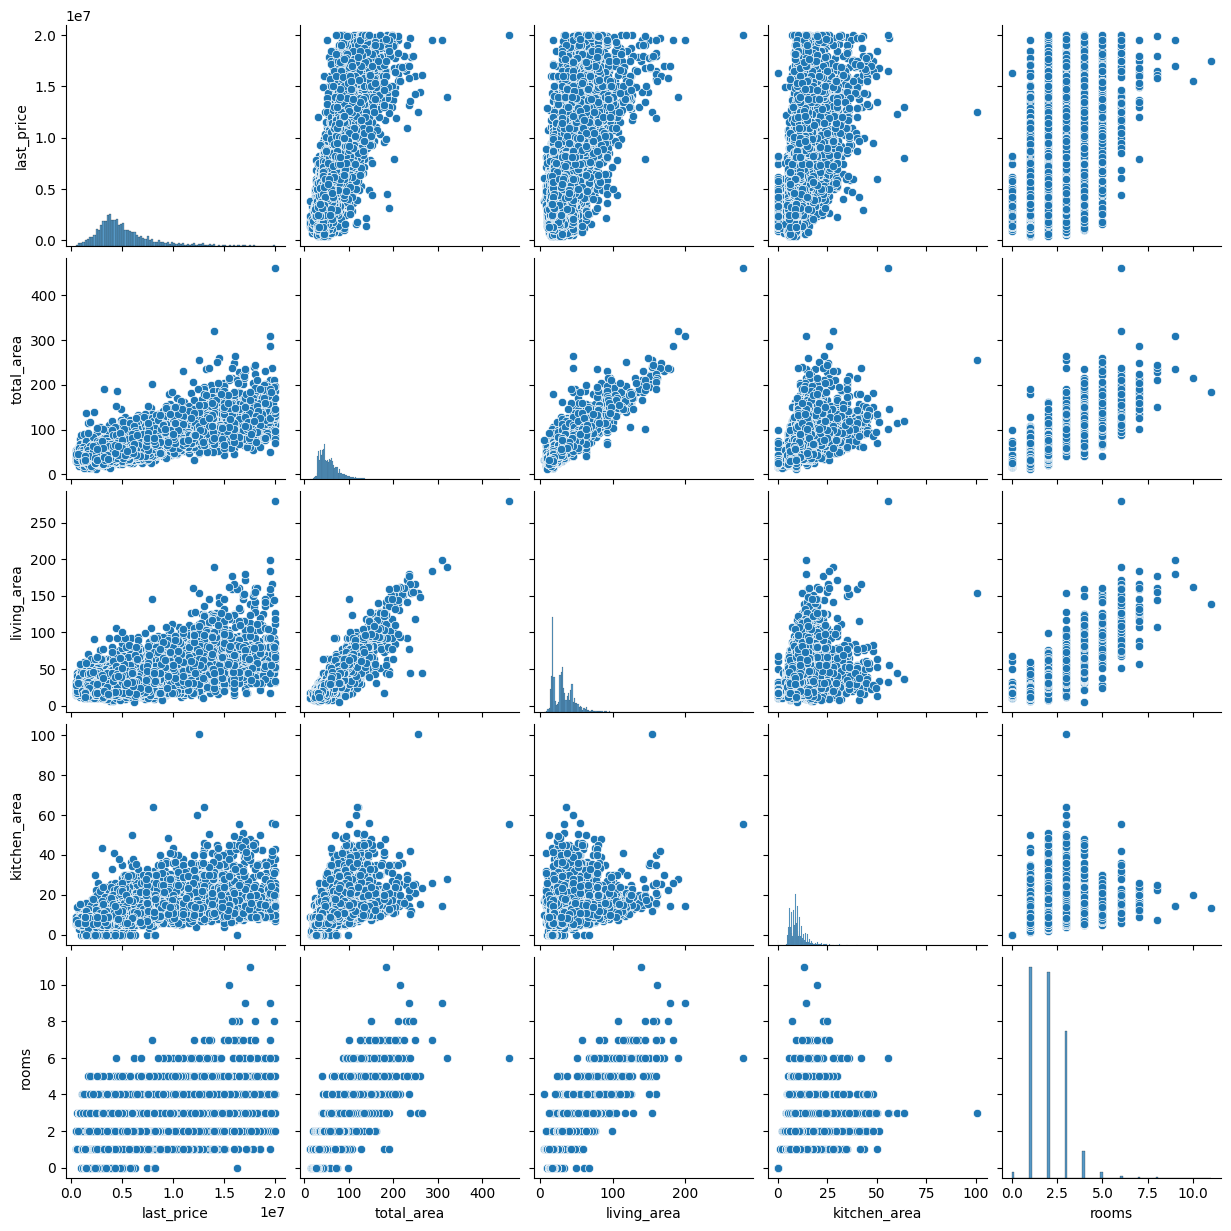

In [113]:
sns.pairplot(data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]);

#### Значение коореляции равно 0.56. Зависимость прослеживается, но уже не такая явная. Такую зависимость можно назвать средне положительной. Значит не всегда стоимость квартиры растет с увеличение размера кухни. 

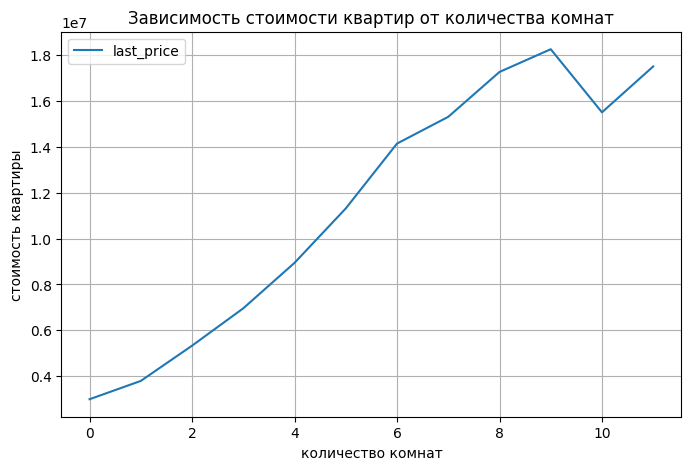

In [115]:
(data.pivot_table(index='rooms', values='last_price')
 .plot(grid=True,figsize=(8,5), title='Зависимость стоимости квартир от количества комнат',
      xlabel='количество комнат', ylabel='стоимость квартиры'));

#### Значение коореляции равно 0.51. Умеренная зависимость стоимости квартир от количества комнат. Думаю, что это связанно с тем, что количество комнат не всегда связанно с площадью квартиры. Может быть мало комнат, но больших  по площади и наоборот.

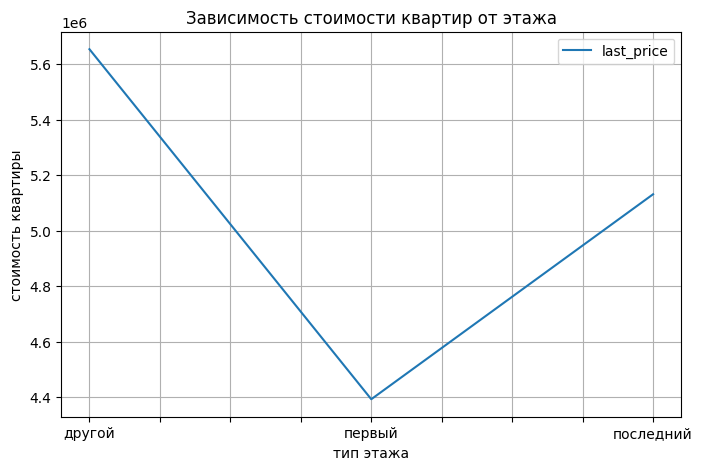

In [116]:
(data.pivot_table(index='floor_type', values='last_price')
 .plot(grid=True, figsize=(8,5), title='Зависимость стоимости квартир от этажа',
      xlabel='тип этажа', ylabel='стоимость квартиры'));

#### На графике видно, самые низкие цена на квартиры на первом этаже, на последнем этаже стоимость чуть выше. Самые высокие цены относятся к категории "другие".

In [117]:
data['last_price'].corr(data['day_publication']).round(2)

-0.02

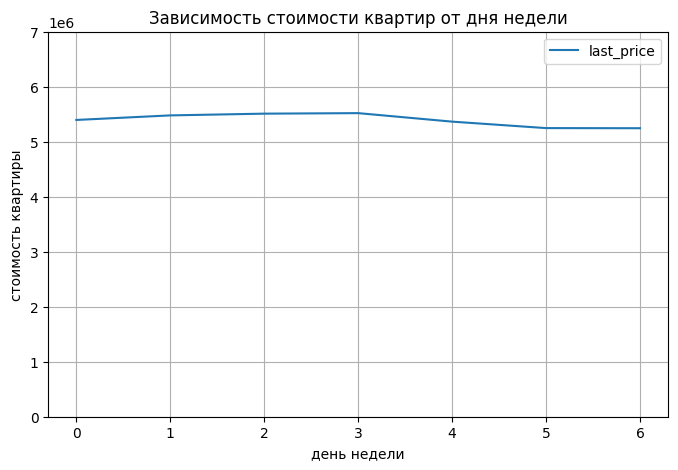

In [118]:
(data.pivot_table(index='day_publication', values='last_price')
 .plot(ylim=(0,7000000),grid=True, figsize=(8,5), title='Зависимость стоимости квартир от дня недели',
      xlabel='день недели', ylabel='стоимость квартиры'));

#### По коэффициенту корреляции(-0,02) видно, что нет зависимости от дня недели публикации к стоимости квартиры.

In [119]:
data['last_price'].corr(data['month_publication']).round(2)

0.0

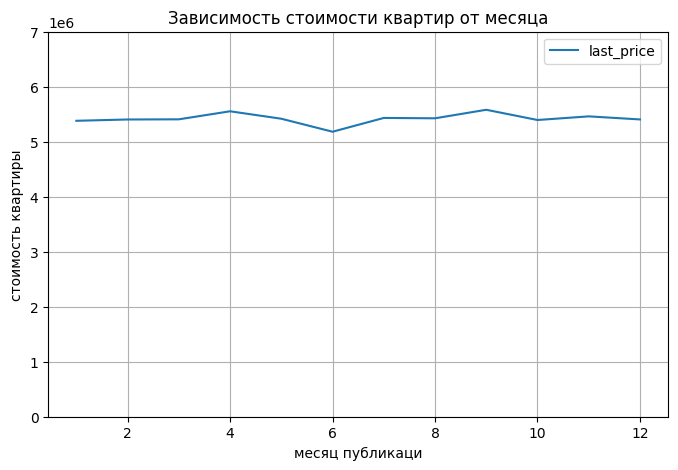

In [120]:
(data.pivot_table(index='month_publication', values='last_price')
 .plot(ylim=(0,7000000), grid=True, figsize=(8,5), title='Зависимость стоимости квартир от месяца',
      xlabel='месяц публикаци', ylabel='стоимость квартиры'));

#### Коэффициент корреляции равен 0. Связь между месяцем публикации и стоимостью недвижимости отсутствует.

In [121]:
data['last_price'].corr(data['year_publication']).round(2)

-0.03

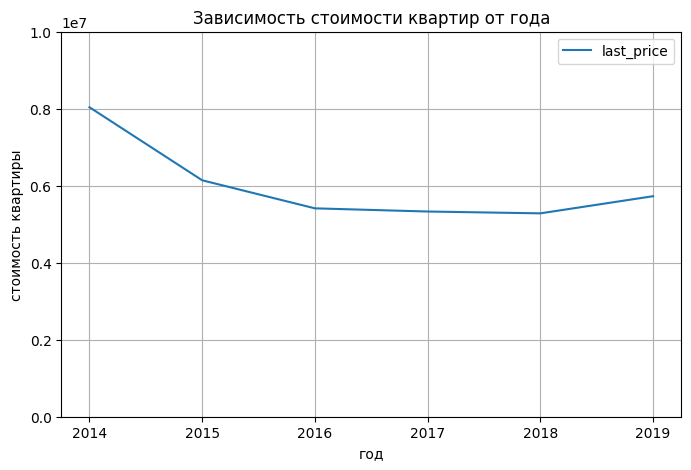

In [122]:
(data.pivot_table(index='year_publication', values='last_price')
 .plot(ylim=(0,10000000),grid=True, figsize=(8,5), title='Зависимость стоимости квартир от года',
      xlabel='год', ylabel='стоимость квартиры'));

#### Год публикации не влияет на стоимость жилья. Коэффициент корреляции равен -0,03

### Вывод:

- Общая площадь квартиры имеет наибольшее влияние на стоимость жилья, что подтверждается высоким коэффициентом корреляции 0.77. Этот параметр является ключевым при оценке стоимости недвижимости.

- Жилая площадь также оказывает существенное влияние на цену квартиры, хотя коэффициент корреляции равен 0.65, что указывает на чуть менее выраженную зависимость по сравнению с общей площадью.

- Размер кухни и количество комнат имеют умеренное влияние на стоимость жилья с коэффициентами корреляции 0.56 и 0.51 соответственно. Это говорит о том, что эти параметры не всегда определяют окончательную стоимость квартиры.

- Этаж, на котором расположена квартира, также влияет на ее стоимость. На первом этаже цены чаще всего ниже из-за ряда негативных факторов, в то время как квартиры на последнем этаже могут иметь немного повышенную цену из-за определенных предпочтений покупателей. Оптимальными же считаются квартиры на этажах категории "другие". Люди более охотно рассматривают такие предложения, но у таких предложении и выше стоимость.

- День недели, месяц и год публикации объявления не оказывают значительного влияния на стоимость жилья, что указывает на отсутствие зависимости между этими параметрами и ценой квартиры.

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [123]:
top_city = data.pivot_table(index='locality_name', values='price_one_meter'
                            , aggfunc=['count', 'mean']).reset_index()
top_city.columns = ['населенный пункт', 'количество объявлений', 'средняя цена'] # заменим названия столбцов 
top_city['средняя цена'] = top_city['средняя цена'].round() # уберем лишние знаки после запятой
top_city = top_city.sort_values(by='количество объявлений', ascending=False)
top_city = top_city.head(10)
top_city.sort_values(by='средняя цена', ascending=False)

,населенный пункт,количество объявлений,средняя цена
304,санкт-петербург,15022,108655.0
298,пушкин,360,101789.0
44,деревня кудрово,299,92474.0
194,поселок парголово,327,90176.0
187,поселок мурино,589,86062.0
255,поселок шушары,440,78677.0
120,колпино,337,75333.0
7,гатчина,307,68746.0
4,всеволожск,397,67214.0
5,выборг,237,58142.0


### Вывод:
Исходя из данных, самая высокая цена за квадратный метр недвижимости в Санкт-Петербурге, а именно 108655 рублей. После Санкт-Петербурга идут Пушкин и деревня Кудрово с близкими значениями цены за квадратный метр. Самая низкая цена за квадратный метр отмечается в городе Выборг(58142).

Эти сведения могут быть полезны при принятии решений о покупке или продаже недвижимости в этих районах.

### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра:

In [124]:
spb_data = data.query("locality_name == 'санкт-петербург'") # оставим только необходимые данные

Text(0.5, 1.0, 'средняя стоимость квартиры в зависимости от удаленности от центра')

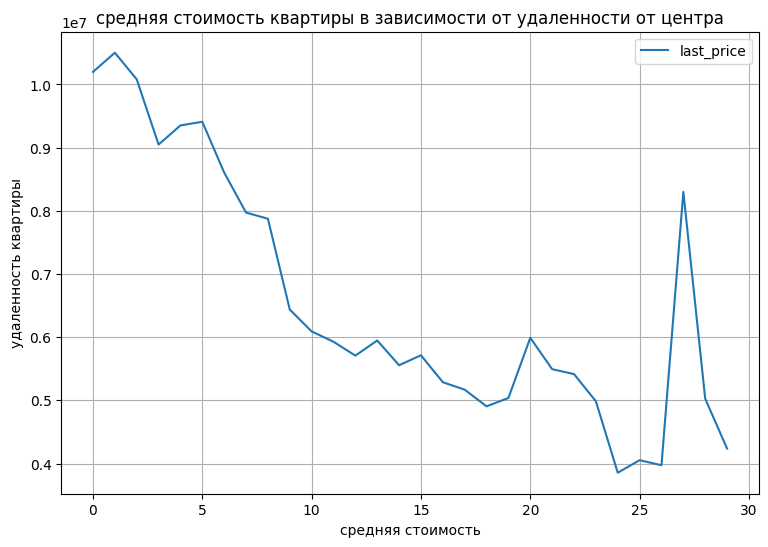

In [125]:
(
spb_data.pivot_table(index='city_сenters_nearest_km', values='last_price', aggfunc='mean')
        .plot(grid=True, style='-', figsize=(9,6), 
             title='средняя стоимость квартиры в зависимости от удаленности от центра',
             xlabel='средняя стоимость', ylabel='удаленность квартиры')
) # построим график из сгрупированных данных
plt.title('средняя стоимость квартиры в зависимости от удаленности от центра')


In [126]:
spb_data['city_сenters_nearest_km'].corr(data['last_price']) # посчитаем коэффициент корреляции для зависимости 

-0.4079745586251833

In [127]:
spb_data = spb_data.pivot_table(index='city_сenters_nearest_km', values='last_price', aggfunc='mean').reset_index()
spb_data.columns = ['расстояние в км.', 'средняя цена']
spb_data['средняя цена'] = spb_data['средняя цена'].round()
spb_data # выведем таблицу средней стоимости к расстоянию от центра

,расстояние в км.,средняя цена
0,0.0,10198571.0
1,1.0,10502468.0
2,2.0,10081748.0
3,3.0,9048717.0
4,4.0,9351467.0
5,5.0,9409820.0
6,6.0,8605809.0
7,7.0,7972256.0
8,8.0,7874560.0
9,9.0,6437557.0


### Вывод: 
Исходя из проведенного анализа данных, можно сделать вывод о том, что существует умеренная обратная зависимость между удаленностью квартиры от центра города и ее стоимостью: чем ближе к центру, тем выше цена за квадратный метр. Наблюдается явный вброс на расстоянии около 27 км от центра, что может указывать на наличие элитных районов или коттеджных поселков в этой зоне. 

### Напишите общий вывод

В ходе выполнения анализа данных были проведены следующие этапы работы:

1.  Открыли файл с данными и изучили общую информацию:
- Через библиотеку pandas открыли csv файл, таблица состоит из 23699 сторк. 
- Проанализировали таблицу и обнаружили в ней пропуски, несоответсвие типов данных, ошибки в названии столбцов. 
- Построили гистограамы для всех числовых значений.  
2. Выполнили предобработку данных
- При обработке данных, исправили некорректные названия столбцов, на стилистически правильные названия. 
- Заполнили пропуски там, где это возможно в зависимости от столбца и его значений, подбрирали значение, которым можно заменить пропущенное значение. Пропуски могли быть вызванны человеческим фактором, возможно они не являются обязательными к заполнению на сайте, так же могли возникнуть при переносе данных.
- Привели каждый столбец к верному типу данных и обяснили, почему там требуется определнный тип данных.
- Удалили все неявние дубликаты, при помощи метода replace.
3. Добавили новые столбцы для дальнейшего анализа, таких как стоимость квадратного метра, день недели, месяц и год публикации объявления, а также расстояние до центра города.
4. Провели исследовательский анализ данных, в ходе которого были выявлены основные факторы, влияющие на стоимость жилья
- Наиболее активный период завершения сделки -95 день, такие данные мы получили на гистограмме. Существуют сделки, которые закрываются через один день, возможно, такие объявления не настоящие, их создают для привлечения внимания или мошенники, а есть и те, которые продаются более 4 лет. Исходя из анализа данных о продолжительности продажи квартир, мы можем выделить быстрые и долгие сделки, а также оценить типичные временные рамки завершения сделок на рынке недвижимости. Так сделаки выполненные в срок до 47 дней - являются быстрыми. Долгими сделаками будем считать те, которые совершаются после 202 дня. 
- Самый влиятельный фактор оказывающий влияние на стоимость жилья - общая площадь квартры, что подтверждается высоким коэффициентом корреляции 0.77. Жилая площадь также оказывает существенное влияние на цену квартиры, хотя коэффициент корреляции равен 0.65. Размер кухни и количество комнат имеют умеренное влияние на стоимость жилья с коэффициентами корреляции 0.56 и 0.51 соответственно. Этаж, на котором расположена квартира, также влияет на ее стоимость. На первом этаже цены чаще всего ниже из-за ряда негативных факторов, в то время как квартиры на последнем этаже могут иметь немного повышенную цену из-за определенных предпочтений покупателей. Оптимальными же считаются квартиры на этажах категории "другие". День недели, месяц и год публикации объявления не оказывают значительного влияния на стоимость жилья.
- Мы посчитали среднюю цену одного квадратного метра в 10-ти населенных пунктах с наибольшим количеством объявлений. Самая высокая цена за квадратный метр недвижимости в Санкт-Петербурге, а именно 108665 рублей. После Санкт-Петербурга идут Пушкин и деревня Кудрово с близкими значениями цены за квадратный метр. Самая низкая цена за квадратный метр отмечается в городе Выборг(58142).
- В ходе выполнения анализа данных, мы взяли все объявления в городе Санкт-Петербург и вычислили их среднюю стоимость на каждый киллометр расстояния. Сделали вывод о том, что существует умеренная обратная зависимость между удаленностью квартиры от центра города и ее стоимостью: чем ближе к центру, тем выше цена за квадратный метр. 

Проведенный анализ данных позволил выявить несколько ключевых факторов, влияющих на стоимость жилья. Основными из них являются общая площадь квартиры, жилая площадь, наличие комнат, размер кухни и этаж, на котором расположена квартира. Эти параметры имеют существенное влияние на цену квадратного метра жилья и позволяют более точно оценить стоимость недвижимости.

Также было установлено, что удаленность квартиры от центра города оказывает определенное влияние на цену жилья. Наблюдается умеренная обратная зависимость: чем ближе квартира к центру города, тем выше цена за квадратный метр. Это может быть объяснено более высоким спросом на жилье в центре и удобствами, доступными в этом районе.

Таким образом, при принятии решений о покупке или продаже недвижимости важно учитывать не только основные характеристики квартиры, но и ее расположение относительно центра города, что может значительно влиять на ее стоимость.
